In [1]:
#CARGAR LAS BASES DE DATOS
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda/TP4')
os.chdir('C:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP4')
#os.chdir('/Users/trinimoran/Documents/Ciencia de Datos/CC408-T13/TP4')

Parte I: Análisis de la base de hogares y tipo de ocupación

## PUNTO 2:

In [2]:
hogar_24 = pd.read_excel('usu_hogar_T124.xlsx')
hogar_04 = pd.read_stata('Hogar_t104.dta')
eph_24 = pd.read_excel('usu_individual_T124.xlsx')
eph_04 = pd.read_stata('Individual_t104.dta')

In [3]:
# Cambiamos los nombres de las columnas a mayúsculas
hogar_04.columns = hogar_04.columns.str.upper()
hogar_24.columns = hogar_24.columns.str.upper()
eph_04.columns = eph_04.columns.str.upper()
eph_24.columns = eph_24.columns.str.upper()

Eliminamos las observaciones que no corresponden a CABA o al Gran Buenos Aires

In [4]:
# Dejamos los datos individuales que tengan solo de CABA y GBA
eph_04_cleaned = eph_04.loc[eph_04['AGLOMERADO'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].copy()
eph_04_cleaned['AGLOMERADO'] = eph_04_cleaned['AGLOMERADO'].replace({'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'})

eph_24_cleaned = eph_24.loc[eph_24['AGLOMERADO'].isin([32, 33])].copy()
eph_24_cleaned['AGLOMERADO'] = eph_24_cleaned['AGLOMERADO'].replace({32: 'CABA', 33: 'GBA'})


#Dejamos los datos de los hogares que tengan solo de CABA y GBA
hogar_04_cleaned = hogar_04.loc[hogar_04['AGLOMERADO'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].copy()
hogar_04_cleaned['AGLOMERADO'] = hogar_04_cleaned['AGLOMERADO'].replace({'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'})

hogar_24_cleaned = hogar_24.loc[hogar_24['AGLOMERADO'].isin([32, 33])].copy()
hogar_24_cleaned['AGLOMERADO'] = hogar_24_cleaned['AGLOMERADO'].replace({32: 'CABA', 33: 'GBA'})


# Verificamos las dimensiones después del filtro
print("Datos hogares 2004 después de filtrar:", hogar_04_cleaned.shape[0])
print("Datos hogares 2024 después de filtrar:", hogar_24_cleaned.shape[0])
print("Datos individuales 2004 después de filtrar:", eph_04_cleaned.shape[0])
print("Datos individuales 2024 después de filtrar:", eph_24_cleaned.shape[0])

Datos hogares 2004 después de filtrar: 2351
Datos hogares 2024 después de filtrar: 2545
Datos individuales 2004 después de filtrar: 7647
Datos individuales 2024 después de filtrar: 7051


C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4218672439.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  eph_04_cleaned['AGLOMERADO'] = eph_04_cleaned['AGLOMERADO'].replace({'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'})
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4218672439.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hogar_04_cleaned['AGLOMERADO'] = hogar_04_cleaned['AGLOMERADO'].replace({'Ciudad de Buenos Aires': 'CABA', 'Partidos del GBA': 'GBA'})


In [5]:
# Aseguramos que CODUSU sea string y NRO_HOGAR sea numérico en todas las bases
for df in [eph_04_cleaned, hogar_04_cleaned, eph_24_cleaned, hogar_24_cleaned]:
    df['CODUSU'] = df['CODUSU'].astype(str)  # Convertimos CODUSU a string
    df['NRO_HOGAR'] = df['NRO_HOGAR'].astype(int)  # Convertimos NRO_HOGAR a entero

# Comprobamos si hay valores nulos en las claves
for name, df in zip(['eph_04', 'hogar_04', 'eph_24', 'hogar_24'], 
                    [eph_04_cleaned, hogar_04_cleaned, eph_24_cleaned, hogar_24_cleaned]):
    print(f"Valores nulos en {name}:")
    print(df[['CODUSU', 'NRO_HOGAR']].isnull().sum())

Valores nulos en eph_04:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_04:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en eph_24:
CODUSU       0
NRO_HOGAR    0
dtype: int64
Valores nulos en hogar_24:
CODUSU       0
NRO_HOGAR    0
dtype: int64


In [6]:
#Dejamos todos los datos relevantes (que usamos después) codificados de la misma forma
eph_04_cleaned['CH04'] = eph_04_cleaned['CH04'].replace({'Varón': 1, 'Mujer': 2})
eph_04_cleaned['CH07'] = eph_04_cleaned['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
eph_04_cleaned['CH08'] = eph_04_cleaned['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
eph_04_cleaned['NIVEL_ED'] = eph_04_cleaned['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
eph_04_cleaned['ESTADO'] = eph_04_cleaned['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
eph_04_cleaned['CAT_INAC'] = eph_04_cleaned['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})

C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4102432337.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_04_cleaned['CH04'] = eph_04_cleaned['CH04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4102432337.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  eph_04_cleaned['CH04'] = eph_04_cleaned['CH04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4102432337.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is depr

In [7]:
# Verificar columnas en las bases antes del merge
print("Columnas en eph_04_cleaned:", eph_04_cleaned.columns.tolist())
print("Columnas en hogar_04_cleaned:", hogar_04_cleaned.columns.tolist())


Columnas en eph_04_cleaned: ['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP

Unimos la base de la encuesta individual con la encuesta de hogares

In [8]:
# Merge para 2004
data_2004 = eph_04_cleaned.merge(hogar_04_cleaned, on=['CODUSU', 'NRO_HOGAR'], how='inner')
print("Datos combinados para 2004:", data_2004.shape)

# Merge para 2024
data_2024 = eph_24_cleaned.merge(hogar_24_cleaned, on=['CODUSU', 'NRO_HOGAR'], how='inner')
print("Datos combinados para 2024:", data_2024.shape)

# Combinamos los dos años
data = pd.concat([data_2004, data_2024], ignore_index=True)
print("Datos finales combinados:", data.shape)



Datos combinados para 2004: (7647, 262)
Datos combinados para 2024: (7051, 263)
Datos finales combinados: (14698, 268)


In [9]:
print(list(data.columns))

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4_x', 'TRIMESTRE_x', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2',

In [10]:
#Como vemos que algunas columnas se crearonn dobles, hacemos arreglos para que sean una sola
# Creamos una lista para las nuevas columnas combinadas
combined_columns = []

# Identificamos las columnas que tienen sufijos '_x'
columns_to_merge = [col for col in data.columns if col.endswith('_x')]

# Iteramos sobre las columnas y combinarlas
for col in columns_to_merge:
    col_y = col.replace('_x', '_y')
    
    # Combinamos las columnas (dando prioridad a los valores de '_x')
    data[col.replace('_x', '')] = data[col].combine_first(data[col_y])
    
    # Añadimos las columnas combinadas a la lista
    combined_columns.append(col.replace('_x', ''))

# Eliminamos las columnas duplicadas
data.drop([col for col in data.columns if col.endswith('_x') or col.endswith('_y')], axis=1, inplace=True)

C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4017983586.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col.replace('_x', '')] = data[col].combine_first(data[col_y])
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4017983586.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col.replace('_x', '')] = data[col].combine_first(data[col_y])
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\4017983586.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [11]:
# Estamos creando esta copia por la advertencia de la línea anterior
final_data = data.copy()

## PUNTO 3:

In [12]:
# Eliminamos las observaciones con datos que no tienen sentido 
# CH06: edad
# PP03D: cantidad de ocupaciones 
# PP08D1: Monto por sueldos / jornales, salario familiar, horas extras, otras bonificaciones habituales y tickets, vales o similares percibidos en el mes de referencia 
# P21: MONTO DE INGRESO DE LA OCUPACIÓN PRINCIPAL 
# IPCF: ingreso per cápita familiar
# IX_TOT: cantidad de personas en un hogar
# Convertimos las columnas relevantes a tipo numérico
cols_to_convert = ['CH06', 'PP03D', 'PP08D1', 'P21','IPCF', 'IX_TOT', 'CAT_INAC']
final_data[cols_to_convert] = final_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminamos las observaciones con datos que no tienen sentido 
final_data.drop(final_data[(final_data['CH06'] < 0) | (final_data['PP03D'] < 0) | (final_data['PP08D1'] < 0) | (final_data['P21'] < 0)| (final_data['IPCF'] < 0)| (final_data['IX_TOT'] < 0)| (final_data['CAT_INAC'] < 0)].index, inplace=True)

# Imprimimos la cantidad de datos restantes después de la limpieza
print("Cantidad de datos después de la limpieza:", len(final_data))

Cantidad de datos después de la limpieza: 13701


In [13]:
print('Cantidad de NaN en edad:', final_data['CH06'].isna().sum())

# Crearmos una copia de final_data solo con las columnas deseadas
# pero saco edad porque se me va a mezclar la edad 9
cols = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'IX_TOT']
data_nsnr = final_data[cols].copy()

# Reemplazar los valores 9, 99, 999, y 9999 por NaN
data_nsnr.replace([9, 99, 999, 9999], np.nan, inplace=True)

# Mostrar un conteo de valores NaN en cada columna
na_columna = data_nsnr.isna().sum()
print("Cantidad de valores no saben/no responde (ahora NaN) por columna:")
print(na_columna)

Cantidad de NaN en edad: 135
Cantidad de valores no saben/no responde (ahora NaN) por columna:
CH04          0
CH07         13
CH08         31
NIVEL_ED      0
ESTADO        0
CAT_INAC      0
IPCF          1
IX_TOT      230
dtype: int64


C:\Users\flori\AppData\Local\Temp\ipykernel_9588\1251624085.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_nsnr.replace([9, 99, 999, 9999], np.nan, inplace=True)


DATOS FALTANTES: 135 en edad, 13 en estado civil (CH07), 20 en cobertura medica (CH08), 1 en ingreso per capita familiar Y 230 en IX_TOT

In [14]:
# Hacemos que la columna 'CH06' sea numérica
final_data.loc[:, 'CH06'] = pd.to_numeric(final_data['CH06'], errors='coerce')

# Calculamos la mediana de la edad por nivel educativo
edad_por_nivel = final_data.groupby('NIVEL_ED')['CH06'].median()

# Definimos una función para rellenar NaN basándose en el nivel educativo
def rellenar_nan_edad(row):
    if pd.isna(row['CH06']): # Si 'CH06' es NaN, devolver la mediana correspondiente del nivel educativo
        return edad_por_nivel.get(row['NIVEL_ED'], row['CH06'])
    return row['CH06']

# Aplicamps la función para rellenar los NaN en 'CH06'
final_data.loc[:, 'CH06'] = final_data.apply(rellenar_nan_edad, axis=1)

# Verificamos que ya no quede ningún NaN
nan_after = final_data['CH06'].isna().sum()
print(f"Cantidad de NaN en la columna CH06 después del relleno: {nan_after}")


Cantidad de NaN en la columna CH06 después del relleno: 0


In [15]:
# Eliminamos los NaN de las que le faltaban pocos datos de la base original
col_nan = ['CH07', 'CH08', 'IPCF','IX_TOT'] 
final_data = final_data.dropna(subset=col_nan)

# Verificamos
nan_after7 = final_data['CH07'].isna().sum()
nan_after8 = final_data['CH08'].isna().sum()
nan_afterIPCF = final_data['IPCF'].isna().sum()
nan_afterIX_TOT = final_data['IX_TOT'].isna().sum()
print(f"Cantidad de NaN en la columna CH07 después del relleno: {nan_after7}")
print(f"Cantidad de NaN en la columna CH08 después del relleno: {nan_after8}")
print(f"Cantidad de NaN en la columna IPCF después del relleno: {nan_afterIPCF}")
print(f"Cantidad de NaN en la columna IX_TOT después del relleno: {nan_afterIX_TOT}")

Cantidad de NaN en la columna CH07 después del relleno: 0
Cantidad de NaN en la columna CH08 después del relleno: 0
Cantidad de NaN en la columna IPCF después del relleno: 0
Cantidad de NaN en la columna IX_TOT después del relleno: 0


## Punto 4:

3 variables relevantes para predecir individuos desocupados

Variable 1: proporción de personas que trabajan en el hogar

In [16]:
# Crear la variable OCUPADO
final_data['OCUPADO'] = final_data['ESTADO'].apply(lambda x: 1 if x == 1 else 0)

# Calcular cantidad de ocupados por hogar
final_data['CANT_OCUPADOS'] = final_data.groupby(['CODUSU', 'NRO_HOGAR'])['OCUPADO'].transform('sum')

# Calcular proporción de ocupados
final_data['PROP_OCUPADOS'] = final_data['CANT_OCUPADOS'] / final_data['IX_TOT']

# Revisar el resultado
print(final_data[['CODUSU', 'NRO_HOGAR', 'CANT_OCUPADOS', 'IX_TOT', 'PROP_OCUPADOS']].head())

     CODUSU  NRO_HOGAR  CANT_OCUPADOS  IX_TOT  PROP_OCUPADOS
0  125098            1              0     1.0           0.00
1  125397            1              1     1.0           1.00
2  125515            1              0     1.0           0.00
3  125558            1              3     4.0           0.75
4  125558            1              3     4.0           0.75


Variable 2: Proporción de menores de edad en el hogar

In [17]:
# Crear columna indicando si es menor de edad
final_data['MENOR'] = final_data['CH06'].apply(lambda x: 1 if x < 18 else 0)

# Calcular cantidad de menores por hogar
final_data['CANT_MENORES'] = final_data.groupby(['CODUSU', 'NRO_HOGAR'])['MENOR'].transform('sum')

# Calcular proporción de menores en el hogar
final_data['PROP_MENORES'] = final_data['CANT_MENORES'] / final_data['IX_TOT']

# Visualizar la variable
print(final_data[['CODUSU', 'NRO_HOGAR', 'CANT_MENORES', 'IX_TOT', 'PROP_MENORES']].head())

     CODUSU  NRO_HOGAR  CANT_MENORES  IX_TOT  PROP_MENORES
0  125098            1             0     1.0           0.0
1  125397            1             0     1.0           0.0
2  125515            1             0     1.0           0.0
3  125558            1             0     4.0           0.0
4  125558            1             0     4.0           0.0


Variable 3: Dependencia económica del hogar. Esta calcula la proporción de habitantes inactivos vs activos

In [26]:
# Crear columnas para identificar inactivos y activos
final_data['INACTIVO'] = final_data['CAT_INAC'].apply(lambda x: 1 if not pd.isna(x) else 0)
final_data['ACTIVO'] = final_data['CAT_OCUP'].apply(lambda x: 1 if not pd.isna(x) else 0)

# Calcular total de inactivos y activos por hogar
final_data['CANT_INACTIVOS'] = final_data.groupby(['CODUSU', 'NRO_HOGAR'])['INACTIVO'].transform('sum')
final_data['CANT_ACTIVOS'] = final_data.groupby(['CODUSU', 'NRO_HOGAR'])['ACTIVO'].transform('sum')

# Calcular relación de dependencia económica
final_data['DEP_ECO'] = final_data['CANT_INACTIVOS'] / (final_data['CANT_ACTIVOS'] + 1)  # +1 para evitar división por 0

# Visualizar la variable
print(final_data[['CODUSU', 'NRO_HOGAR', 'CANT_INACTIVOS', 'CANT_ACTIVOS', 'DEP_ECO']].head())

     CODUSU  NRO_HOGAR  CANT_INACTIVOS  CANT_ACTIVOS  DEP_ECO
0  125098            1               1             1      0.5
1  125397            1               1             1      0.5
2  125515            1               1             1      0.5
3  125558            1               4             4      0.8
4  125558            1               4             4      0.8


Variable 4: Nivel educativo promedio

In [28]:
# Convertir niveles educativos en valores numéricos (si no lo están ya)
niveles_educativos = {
    'Sin instrucción': 0,
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,}

# Reemplazar niveles educativos con valores numéricos
final_data['NIVEL_ED_NUM'] = final_data['NIVEL_ED'].replace(niveles_educativos)

# Filtrar solo los mayores de 18 años
final_data_mayores18 = final_data[final_data['CH06'] > 18]

# Calcular promedio educativo por hogar considerando solo mayores de 18
final_data['EDUC_PROM'] = (
    final_data_mayores18.groupby(['CODUSU', 'NRO_HOGAR'])['NIVEL_ED_NUM']
    .transform('mean')  # Calcular promedio
    .round()            # Redondear
)

# Visualizar la variable
print(final_data[['CODUSU', 'NRO_HOGAR', 'NIVEL_ED_NUM', 'EDUC_PROM']].drop_duplicates(subset=['CODUSU', 'NRO_HOGAR']).head())


     CODUSU  NRO_HOGAR  NIVEL_ED_NUM  EDUC_PROM
0  125098            1             3        3.0
1  125397            1             2        2.0
2  125515            1             2        2.0
3  125558            1             2        4.0
7  125599            1             4        3.0


## Punto 5:

Estadísitca descriptiva de 3 variables de la encuesta

Estadísticas descriptivas de la edad (CH06):
count    13701.000000
mean        35.266550
std         23.137095
min          1.000000
25%         16.000000
50%         32.000000
75%         53.000000
max         97.000000
Name: CH06, dtype: float64


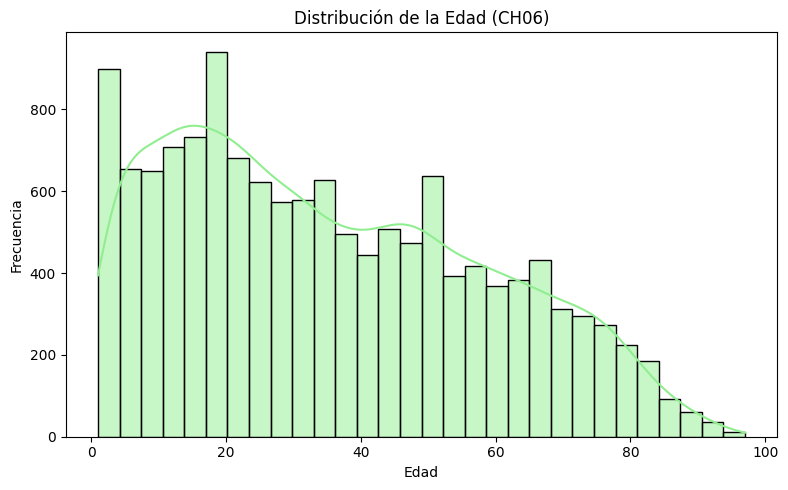

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Estadísticas descriptivas de CH06 (Edad) ---
print("Estadísticas descriptivas de la edad (CH06):")
print(final_data['CH06'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(final_data['CH06'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución de la Edad (CH06)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [30]:
# --- 2. Frecuencias y proporciones de NIVEL_ED ---
print("\nFrecuencias y proporciones de NIVEL_ED:")
nivel_ed_frecuencias = final_data['NIVEL_ED'].value_counts()
nivel_ed_proporciones = final_data['NIVEL_ED'].value_counts(normalize=True) * 100
print(nivel_ed_frecuencias)
print(nivel_ed_proporciones)



Frecuencias y proporciones de NIVEL_ED:
NIVEL_ED
3    2661
4    2369
2    2285
1    2254
6    1500
5    1460
7    1172
Name: count, dtype: int64
NIVEL_ED
3    19.421940
4    17.290709
2    16.677615
1    16.451354
6    10.948106
5    10.656156
7     8.554120
Name: proportion, dtype: float64


In [31]:
# --- 3. Frecuencias y proporciones de CAT_INAC ---
print("\nFrecuencias y proporciones de CAT_INAC:")
cat_inac_frecuencias = final_data['CAT_INAC'].value_counts()
cat_inac_proporciones = final_data['CAT_INAC'].value_counts(normalize=True) * 100
print(cat_inac_frecuencias)
print(cat_inac_proporciones)


Frecuencias y proporciones de CAT_INAC:
CAT_INAC
0.0    6247
3.0    3034
4.0    1469
1.0    1385
5.0    1114
7.0     320
6.0     100
2.0      32
Name: count, dtype: int64
CAT_INAC
0.0    45.595212
3.0    22.144369
4.0    10.721845
1.0    10.108751
5.0     8.130793
7.0     2.335596
6.0     0.729874
2.0     0.233560
Name: proportion, dtype: float64


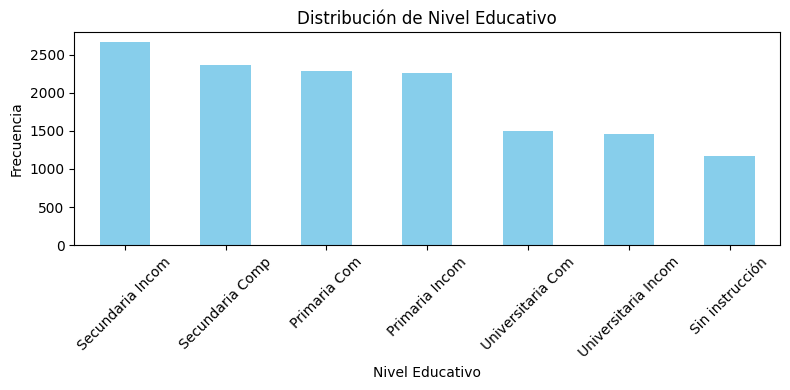

In [21]:
# Diccionario para mapear los valores de NIVEL_ED
niveles_educativos = {
    1: 'Primaria Incom',
    2: 'Primaria Com',
    3: 'Secundaria Incom',
    4: 'Secundaria Comp',
    5: 'Universitaria Incom',
    6: 'Universitaria Com',
    7: 'Sin instrucción',
    9: 'Ns./Nr.'
}

# Cambiar los índices de nivel_ed_frecuencias a etiquetas
nivel_ed_frecuencias.index = nivel_ed_frecuencias.index.map(niveles_educativos)

# Graficar NIVEL_ED con etiquetas descriptivas
plt.figure(figsize=(8, 4))
nivel_ed_frecuencias.plot(kind='bar', color='skyblue', title='Distribución de Nivel Educativo')
plt.ylabel('Frecuencia')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

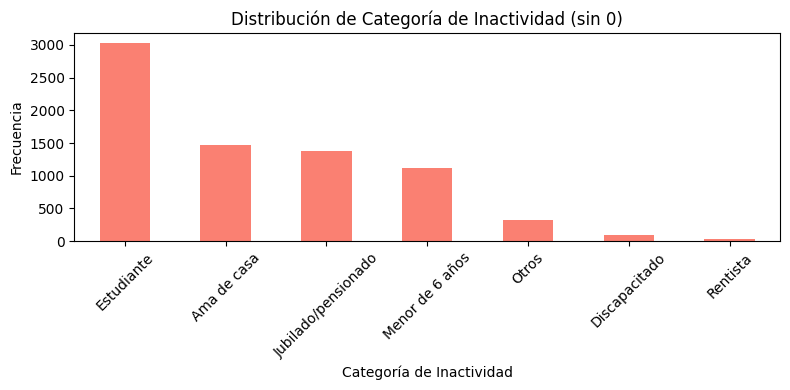

In [22]:
# Diccionario para mapear los valores de CAT_INAC
categorias_inactividad = {
    1: 'Jubilado/pensionado',
    2: 'Rentista',
    3: 'Estudiante',
    4: 'Ama de casa',
    5: 'Menor de 6 años',
    6: 'Discapacitado',
    7: 'Otros'
}

# Filtrar las frecuencias para excluir el valor 0
cat_inac_frecuencias_sin_cero = cat_inac_frecuencias[cat_inac_frecuencias.index != 0]

# Cambiar los índices de cat_inac_frecuencias_sin_cero a etiquetas
cat_inac_frecuencias_sin_cero.index = cat_inac_frecuencias_sin_cero.index.map(categorias_inactividad)

# Graficar CAT_INAC con etiquetas descriptivas
plt.figure(figsize=(8, 4))
cat_inac_frecuencias_sin_cero.plot(kind='bar', color='salmon', title='Distribución de Categoría de Inactividad (sin 0)')
plt.ylabel('Frecuencia')
plt.xlabel('Categoría de Inactividad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Parte 2

Punto 1:

Partimos la base en entrenamiento y prueba

1) Para cada año,partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [23]:
# Filtrar datos por año
data_2004 = final_data[final_data['ANO4'] == 2004]
data_2024 = final_data[final_data['ANO4'] == 2024]

In [24]:
# Crear variable DESOCUPADO
for df in [data_2004, data_2024]:
    df['DESOCUPADO'] = df['ESTADO'].apply(lambda x: 1 if x == 2 else 0)

C:\Users\flori\AppData\Local\Temp\ipykernel_9588\1054582636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DESOCUPADO'] = df['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\flori\AppData\Local\Temp\ipykernel_9588\1054582636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DESOCUPADO'] = df['ESTADO'].apply(lambda x: 1 if x == 2 else 0)


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Queda como varible dependiente "DESOCUPADO" y el resto de variables con impacto en dicha varible serán las dependientes 
# Para 2004
y_2004 = respondieron_2004['DESOCUPADO']
# todas las columnas menos desocupado
X_2004 = respondieron_2004[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'MENOR', 'OCUPADO', 'INACTIVO', 'ACTIVO', 'DEPENDENCIA_ECONOMICA', 'EDUC_PROMEDIO']]

# Partición
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

# Columna de unos
X_train_2004 = pd.concat([pd.Series(1, index=X_train_2004.index, name="Intercepto"), X_train_2004], axis=1)
X_test_2004 = pd.concat([pd.Series(1, index=X_test_2004.index, name="Intercepto"), X_test_2004], axis=1)


# Para 2024
y_2024 = respondieron_2024['DESOCUPADO']
# todas las columnas menos desocupado
X_2024 = respondieron_2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'MENOR', 'OCUPADO', 'INACTIVO', 'ACTIVO', 'DEPENDENCIA_ECONOMICA', 'EDUC_PROMEDIO']]

# Partición
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Columna de unos
X_train_2024 = pd.concat([pd.Series(1, index=X_train_2024.index, name="Intercepto"), X_train_2024], axis=1)
X_test_2024 = pd.concat([pd.Series(1, index=X_test_2024.index, name="Intercepto"), X_test_2024], axis=1)

# Convertimos la columna CH07 a variables dummy
X_2004 = pd.get_dummies(X_2004, columns=['ESTADO'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['ESTADO'], drop_first=True)
X_2004 = pd.get_dummies(X_2004, columns=['CH07'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['CH07'], drop_first=True)
X_2004 = pd.get_dummies(X_2004, columns=['NIVEL_ED'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['NIVEL_ED'], drop_first=True)
X_2004 = pd.get_dummies(X_2004, columns=['CH08'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['CH08'], drop_first=True)
X_2004 = pd.get_dummies(X_2004, columns=['CH04'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['CH04'], drop_first=True)
X_2004 = pd.get_dummies(X_2004, columns=['CAT_INAC'], drop_first=True)
X_2024 = pd.get_dummies(X_2024, columns=['CAT_INAC'], drop_first=True)


NameError: name 'respondieron_2004' is not defined

Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?